In [ ]:
import pandas as pd
import numpy as np 
import pickle 
import numpy as np 
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string as s
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **Code**

In [ ]:
# 1 means that the news is fake and 0 means that the news s real
df = pd.read_csv("news.csv")
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
#df2 = df.drop(['id','text','author'], axis=1)
#df2 = df.filter(['title'])
#df3 = df2.rename(columns={"Lable" : "Fake News"}, inplace = True)
#df2['title'] = df2['title'].astype(str)
#df2

In [ ]:
df = df[df['title'].notna()]

In [ ]:
exx=df.title
#train_x,test_x=train_test_split(x,test_size=20799,random_state=2)
#test_x
exx

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799                            What Keeps the F-35 Alive
Name: title, Length: 20242, dtype: object

In [ ]:
def tokenization(text):
    lst=text.split()
    return lst
exx2=exx.apply(tokenization)

In [ ]:
def lowercasing(lst):
    new_lst=[]
    for i in lst:
        i=i.lower()
        new_lst.append(i)
    return new_lst
exx2=exx2.apply(lowercasing)  

In [ ]:
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for j in s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
exx2=exx2.apply(remove_punctuations)
#test_x=test_x.apply(remove_punctuations)  

In [ ]:
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]
    for i in lst:
        for j in s.digits:    
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in nodig_lst:
        if i!='':
            new_lst.append(i)
    return new_lst
exx2=exx2.apply(remove_numbers)
#test_x=test_x.apply(remove_numbers)

In [ ]:
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

exx2=exx2.apply(remove_stopwords)
#test_x=test_x.apply(remove_stopwords)  

In [ ]:
def remove_spaces(lst):
    new_lst=[]
    for i in lst:
        i=i.strip()
        new_lst.append(i)
    return new_lst
exx2=exx2.apply(remove_spaces)
#test_x=test_x.apply(remove_spaces)

In [ ]:
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
exx2=exx2.apply(lemmatzation)
#test_x=test_x.apply(lemmatzation)

In [ ]:
#exx2 = exx.astype(str)
#exx2

In [ ]:
exx2=exx2.apply(lambda x: ''.join(i+' ' for i in x))

In [ ]:
print(type(exx2))
exx2.head()

<class 'pandas.core.series.Series'>


0    house dem aide didn’t even see comey’s letter ...
1    flynn hillary clinton big woman campus breitbart 
2                               truth might get fired 
3       civilian killed single u airstrike identified 
4    iranian woman jailed fictional unpublished sto...
Name: title, dtype: object

In [ ]:
#ans = exx
#print(type(ans))
#for i in range(0,len(exx)):
 # ans[i] = lowercasing(exx[i])
 # ans[i] = remove_punctuations(exx[i])
 # ans[i] = remove_numbers(exx[i])
 # ans[i] = remove_stopwords(exx[i])
  #ans[i] = remove_spaces(exx[i])
  #ans[i] = lemmatzation(exx[i])
  

In [ ]:
#test_x=test_x.apply(lambda x: ''.join(i+' ' for i in x))

In [ ]:
joblib_vect = pickle.load(open('tfidfvect96.pkl', 'rb'))

### **Database with 96% accuracy**

In [ ]:
"""from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
test_1=tfidf.transform(ans)
test_arr=test_1.toarray()"""

joblib_model = pickle.load(open('naive96.pkl', 'rb'))
joblib_vect = pickle.load(open('tfidfvect96.pkl', 'rb'))
ans1=joblib_vect.transform(exx2)
ans = ans1.toarray()
pred_ans=joblib_model.predict(ans)

In [ ]:
clickbait_list = pred_ans.tolist()
print(clickbait_list)

[1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 

### **Database with 81% accuracy**

In [ ]:
joblib_model2 = pickle.load(open('finalized_model.pkl', 'rb'))
joblib_vect2 = pickle.load(open('tfidfvect96.pkl', 'rb'))
ans1=joblib_vect2.transform(exx2)
ans2 = ans1.toarray()
pred_ans2=joblib_model.predict(ans2)

In [ ]:
clickbait_list2 = pred_ans2.tolist()
print(clickbait_list2)

[1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 

### **Appending to the database**

In [ ]:
if(clickbait_list2 == clickbait_list):
  print("1")

1


In [ ]:
df2 = pd.DataFrame()
df2["id"] = df.id
df2["title"] = df.title
df2["author"] = df.author
df2["text"] = df.text
df2["fake_news"] = df.label
df2["clickbait"] = clickbait_list
df2.head(10)

,id,title,author,text,fake_news,clickbait
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,0
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,0
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,1
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,0


In [ ]:
df.to_csv('FakeNews_and_Clickbait_Detection.csv')

### Visualization

In [ ]:
nc = 0
fnc = 0
fnnc = 0
nnc = 0
for i in range(len(df2)):
  if(df2.iloc[i,4] == 1):
    if(df2.iloc[i,5] == 1):
      fnc+=1
    else:
      fnnc+=1
  else:
    if(df2.iloc[i,5] == 1):
      nc+=1
    else:
      nnc+=1
print(nc,fnc,fnnc,nnc)


2626 2809 7046 7761


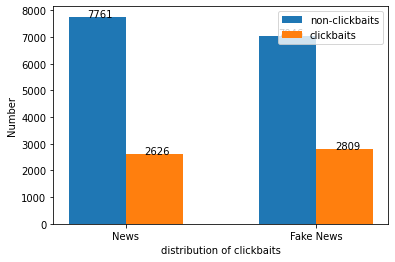

In [ ]:

x_names = ["News", "Fake News"]
nc_values = [nnc,fnnc]
c_values = [nc,fnc] 
X_axis = np.arange(len(x_names))
  
plt.bar(X_axis - 0.15, nc_values, 0.3, label = 'non-clickbaits')
for i in range(len(X_axis)):
        plt.text(i - 0.2,nc_values[i],nc_values[i])
plt.bar(X_axis + 0.15, c_values, 0.3, label = 'clickbaits')
for i in range(len(X_axis)):
        plt.text(i + 0.1,c_values[i],c_values[i])
plt.xticks(X_axis, x_names)
plt.xlabel("distribution of clickbaits")
plt.ylabel("Number")

plt.legend()
plt.show()

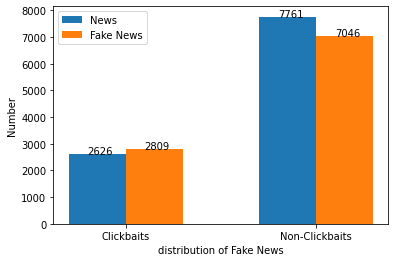

In [ ]:
x_names = ["Clickbaits", "Non-Clickbaits"]
n_values = [nc,nnc]
fn_values = [fnc,fnnc] 
X_axis = np.arange(len(x_names))
  
plt.bar(X_axis - 0.15, n_values, 0.3, label = 'News')
for i in range(len(X_axis)):
        plt.text(i - 0.2,n_values[i],n_values[i])
plt.bar(X_axis + 0.15, fn_values, 0.3, label = 'Fake News')
for i in range(len(X_axis)):
        plt.text(i + 0.1,fn_values[i],fn_values[i])
plt.xticks(X_axis, x_names)
plt.xlabel("distribution of Fake News")
plt.ylabel("Number")

plt.legend()
plt.show()